* K means clustering, assigns data points to one of the K clusters depending on their distance from the center of the clusters. 
* Starts by randomly assigning the clusters centroid in the space. Then each data point assign to one of the cluster based on its distance from centroid of the cluster. After assigning each point to one of the cluster, new cluster centroids are assigned. This process runs iteratively until it finds good cluster.
* In some cases, K is not clearly defined, and we have to think about the optimal number of K.
* K Means clustering performs best data is well separated.
* When data points overlapped this clustering is not suitable.
* K Means is faster as compare to other clustering technique. It provides strong coupling between the data points.
* K Means cluster do not provide clear information regarding the quality of clusters.
* Different initial assignment of cluster centroid may lead to different clusters.
* Also, K Means algorithm is sensitive to noise. It may have stuck in local minima.

WORKING: 
1. First, we randomly initialize k points, called means or cluster centroids.
2. We categorize each item to its closest mean, and we update the mean’s coordinates, which are the averages of the items categorized in that cluster so far.
3. We repeat the process for a given number of iterations and at the end, we have our clusters.


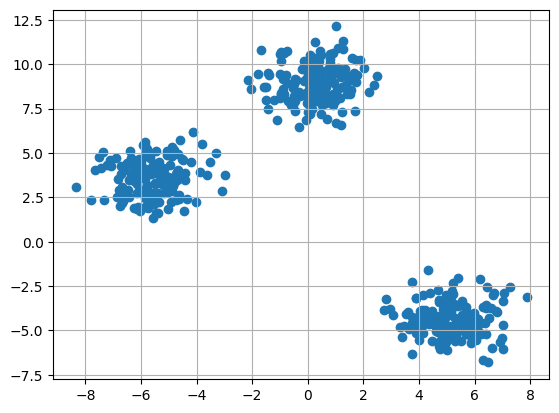

In [2]:
## Import the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

### Creating custom dataset with make_blobs and plotting it
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()


In [3]:
#### initializing random centroids 
k = 3

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }
    
    clusters[idx] = cluster
    
clusters


{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

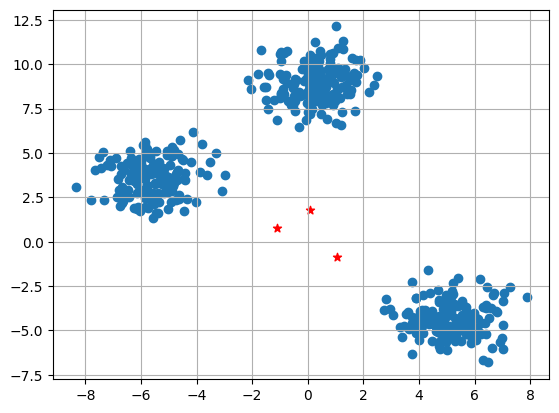

In [4]:
### Plot the random initialize center with data points

plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()


In [5]:
## define euclidean distance
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))


## creating a function to assign, update the cluster center. 
#Implementing E step 
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []
        
        curr_x = X[idx]
        
        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters
        
#Implementing the M-Step
def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center
            
            clusters[i]['points'] = []
    return clusters

#### creating a function to predict the cluster for datapoints
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred   


### assign, update and predict the cluster center 
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)


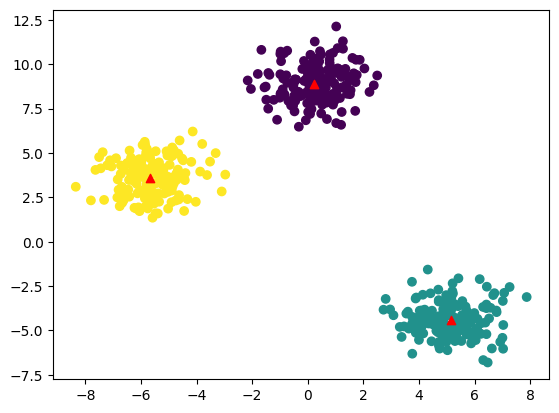

In [6]:
### plott the data points with their predicted cluster center
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()


The red markers represent the updated cluster centers after the E-M steps in the K-means clustering algorithm

## Elbow Method

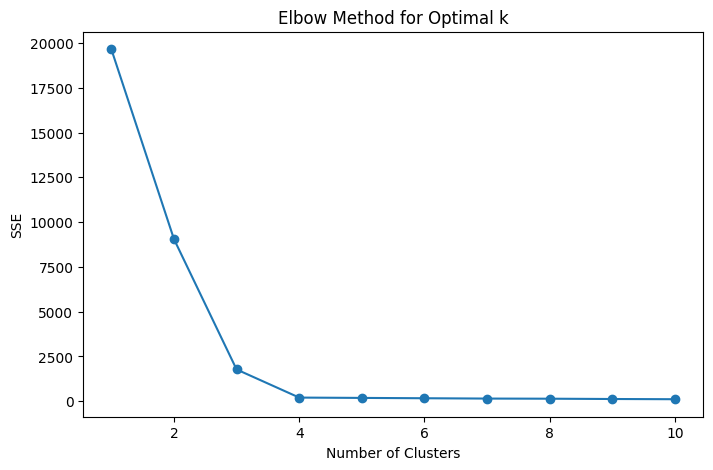

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import make_blobs

# Define random_state for reproducibility
random_state = 42

# Generate synthetic data
n_samples = 300
n_features = 2
n_clusters = 4

X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, cluster_std=0.60, random_state=random_state)

# Find optimum number of clusters using the elbow method
sse = []  # Sum of Squared Errors
for k in range(1, 11):
    mbkm = MiniBatchKMeans(n_clusters=k, random_state=random_state)
    try:
        mbkm.fit(X)
        sse.append(mbkm.inertia_)
    except Exception as e:
        print(f"An error occurred during MiniBatchKMeans fitting: {e}")
        break

# Check if sse is empty
if len(sse) == 0:
    print("No SSE values were computed.")
else:
    # Plot SSE against the number of clusters
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(sse) + 1), sse, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.title('Elbow Method for Optimal k')
    plt.show()


## K-Means Clustering Model

In [18]:
kmeans = KMeans(n_clusters = 3, random_state = 2)
kmeans.fit(X)
kmeans.cluster_centers_


NameError: name 'KMeans' is not defined